#Telugu hate detection


pre processing

In [ ]:
!pip3 install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=c22651d971f36831b1abbecf67defdd9f9888a97c1a56835ad86f81b226f3583
  Stored in directory: /root/.cache/pip/wheels/81/f2/e0/d578821d723b473d18610ea93810e4a5402463919f07e603d9
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [ ]:
!pip install openpyxl

In [ ]:
!pip install indic_nlp_library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 15.1 MB/s eta 0:00:00


In [ ]:
!pip install translate

In [ ]:
import googletrans
from googletrans import Translator

translator = Translator()

sentence = 'Amazon Prime lo Lucifer ani type chesthe story enti, complete movie osthundhi  '

trans_lang = translator.translate(sentence,src='te',dest='en')

print(trans_lang)

Translated(src=te, dest=en, text=Type Lucifer on Amazon Prime What's Story, Complete Movie, pronunciation=None, extra_data="{'translat...")


In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [ ]:
!pip install nltk

In [ ]:
from indicnlp.tokenize import indic_tokenize
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_train = pd.read_excel("/content/training_data_telugu-hate.xlsx")
df_test = pd.read_excel("/content/telugu-english-test-data-with-labels.xlsx")

In [ ]:
df_train.head()

,S.No,Comments,Label
0,HATE_1001,Thappu chesina vaallaku vanike kaadu inka anni modalithavi . Enta kaalam students life tho aadukuntu crores earn chedtharu illegal ga.,hate
1,HATE_1002,Dhusta chaathuryam! Meeru ilantivi enni chesina em pikalerra!,hate
2,HATE_1003,Vetakaram super. Govt ki siggu seram radu. Endukante siggu seram manushulaku mathrme vuntundani na abiprayam.,hate
3,HATE_1004,Only rajakiyam ga vadukovatanike ee dharidrapu arestlu,hate
4,HATE_1005,Katam hogaya narayana pedda bokada college,hate


In [ ]:
df_test.head()

,S.No,Comments,Label
0,1,"ఎన్ని సార్లు అయిన వినాలని ఉంది చిట్టి తల్లి సూపర్ మా,,",non-hate
1,2,ఫ్యూచర్ లో బాగ work out అవుతుంది సూపర్.,non-hate
2,3,ఇది బెండపూడి గవ్నమెంట్ స్టూడెంట్స్ కి మాత్రమే సాధ్యం.,non-hate
3,4,తెలుగులో మాట్లాడినప్పుడు చాలా అందంగా వినసొంపుగా ఉంది,non-hate
4,5,సూపర్ సిస్టర్ ఫ్యూచర్ లో రైల్వే లో జాబ్ రావాలని కోరుకుంటున్నాను అల్ ది బెస్టు,non-hate


In [ ]:
df_train["Comments"] = df_train["Comments"].str.replace('\n', ' ')
df_test["Comments"] = df_test["Comments"].str.replace('\n', ' ')

In [ ]:
def translate_to_english(text):
    translator = Translator()
    trans_lang = translator.translate(text, src='te', dest='en')
    return trans_lang.text

In [ ]:
df_train['Translated_Text'] = ""

for index, row in df_train.iterrows():
    telugu_text = row['Comments']
    translated_text = translate_to_english(telugu_text)
    df_train.at[index, 'Translated_Text'] = translated_text

In [ ]:
df_test['Translated_Text'] = ""

for index, row in df_test.iterrows():
    telugu_text = row['Comments']
    translated_text = translate_to_english(telugu_text)
    df_test.at[index, 'Translated_Text'] = translated_text

In [ ]:
df_train.head()

,S.No,Comments,Label,Translated_Text
0,HATE_1001,Thappu chesina vaallaku vanike kaadu inka anni modalithavi . Enta kaalam students life tho aadukuntu crores earn chedtharu illegal ga.,hate,"They are not wrong, but they are all initial. How long is the Students Playing with Life of Kroes Aarn."
1,HATE_1002,Dhusta chaathuryam! Meeru ilantivi enni chesina em pikalerra!,hate,The wicked ingenuity! No matter how many you do this!
2,HATE_1003,Vetakaram super. Govt ki siggu seram radu. Endukante siggu seram manushulaku mathrme vuntundani na abiprayam.,hate,Vetakaram Super. Govt does not come as a shame. Because it is my opinion that the shame is only for men.
3,HATE_1004,Only rajakiyam ga vadukovatanike ee dharidrapu arestlu,hate,The arrests of these poor for the use of only politics
4,HATE_1005,Katam hogaya narayana pedda bokada college,hate,Katam Hogaya Narayana is the big boka college


In [ ]:
df_test.head()

,S.No,Comments,Label,Translated_Text
0,1,"ఎన్ని సార్లు అయిన వినాలని ఉంది చిట్టి తల్లి సూపర్ మా,,",non-hate,How many times do you want to hear
1,2,ఫ్యూచర్ లో బాగ work out అవుతుంది సూపర్.,non-hate,In the Future Super will be out of work.
2,3,ఇది బెండపూడి గవ్నమెంట్ స్టూడెంట్స్ కి మాత్రమే సాధ్యం.,non-hate,This is only possible for Bendapudi Govnation Students.
3,4,తెలుగులో మాట్లాడినప్పుడు చాలా అందంగా వినసొంపుగా ఉంది,non-hate,Is very pretty humble when talking in Telugu
4,5,సూపర్ సిస్టర్ ఫ్యూచర్ లో రైల్వే లో జాబ్ రావాలని కోరుకుంటున్నాను అల్ ది బెస్టు,non-hate,I want to get a job in Railway in Super Sister Future All the Best


In [ ]:
def preprocess_text(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    cleaned_text = cleaned_text.replace('\n', ' ')
    return cleaned_text

In [ ]:
df_train['cleaned_comments'] = df_train['Translated_Text'].apply(preprocess_text)
df_test['cleaned_comments'] = df_test['Translated_Text'].apply(preprocess_text)

In [ ]:
def tokeniser(text):
    tokens = indic_tokenize.trivial_tokenize(text)
    return tokens

In [ ]:
df_train['tokenized_comments'] = df_train['cleaned_comments'].apply(tokeniser)
df_test['tokenized_comments'] = df_test['cleaned_comments'].apply(tokeniser)

In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in text if word.lower() not in stop_words]
    return filtered_tokens

In [ ]:
# Apply the function to the 'TextColumn' in the DataFrame
df_train['final_text'] = df_train['tokenized_comments'].apply(remove_stopwords)
df_test['final_text'] = df_test['tokenized_comments'].apply(remove_stopwords)

In [ ]:
def classify(text):
    if re.match(r'^[అ-఺\ా-౿\s0-9]*$', text):
        return 'Telugu'
    elif re.match(r'^[a-zA-Z\s0-9]*$', text):
        return 'English'
    elif re.match(r'^[అ-఺\ా-౿a-zA-Z\s0-9]*$', text):
        return 'Mixed'
    else:
        return 'Unknown'

In [ ]:
df_train['lang_type'] = df_train['Translated_Text'].apply(classify)
df_test['lang_type'] = df_test['Translated_Text'].apply(classify)

In [ ]:
df_test['lang_type'].value_counts()

,count
lang_type,
English,312
Unknown,185
Mixed,3


In [ ]:
df_train['lang_type'].value_counts()

,count
lang_type,
English,2050
Unknown,1929
Mixed,19
Telugu,2


In [ ]:
df_train.to_excel("/content/train_data_translation.xlsx", index=False, engine='openpyxl')
df_test.to_excel("/content/test_data_translation.xlsx", index=False, engine='openpyxl')

In [ ]:
df_test.head()

,S.No,Comments,Label,Translated_Text,cleaned_comments,tokenized_comments,final_text,lang_type
0,1,"ఎన్ని సార్లు అయిన వినాలని ఉంది చిట్టి తల్లి సూపర్ మా,,",non-hate,How many times do you want to hear,How many times do you want to hear,"[How, many, times, do, you, want, to, hear]","[many, times, want, hear]",English
1,2,ఫ్యూచర్ లో బాగ work out అవుతుంది సూపర్.,non-hate,In the Future Super will be out of work.,In the Future Super will be out of work,"[In, the, Future, Super, will, be, out, of, work]","[Future, Super, work]",Unknown
2,3,ఇది బెండపూడి గవ్నమెంట్ స్టూడెంట్స్ కి మాత్రమే సాధ్యం.,non-hate,This is only possible for Bendapudi Govnation Students.,This is only possible for Bendapudi Govnation Students,"[This, is, only, possible, for, Bendapudi, Govnation, Students]","[possible, Bendapudi, Govnation, Students]",Unknown
3,4,తెలుగులో మాట్లాడినప్పుడు చాలా అందంగా వినసొంపుగా ఉంది,non-hate,Is very pretty humble when talking in Telugu,Is very pretty humble when talking in Telugu,"[Is, very, pretty, humble, when, talking, in, Telugu]","[pretty, humble, talking, Telugu]",English
4,5,సూపర్ సిస్టర్ ఫ్యూచర్ లో రైల్వే లో జాబ్ రావాలని కోరుకుంటున్నాను అల్ ది బెస్టు,non-hate,I want to get a job in Railway in Super Sister Future All the Best,I want to get a job in Railway in Super Sister Future All the Best,"[I, want, to, get, a, job, in, Railway, in, Super, Sister, Future, All, the, Best]","[want, get, job, Railway, Super, Sister, Future, Best]",English


#Model Training

In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Training data
train_data = pd.read_excel("/content/train_data_translation.xlsx")

train_data.head()

,S.No,Comments,Label,Translated_Text,cleaned_comments,tokenized_comments,final_text,lang_type
0,HATE_1001,Thappu chesina vaallaku vanike kaadu inka anni modalithavi . Enta kaalam students life tho aadukuntu crores earn chedtharu illegal ga.,hate,"They are not wrong, but they are all initial. How long is the Students Playing with Life of Kroes Aarn.",They are not wrong but they are all initial How long is the Students Playing with Life of Kroes Aarn,"['They', 'are', 'not', 'wrong', 'but', 'they', 'are', 'all', 'initial', 'How', 'long', 'is', 'the', 'Students', 'Playing', 'with', 'Life', 'of', 'Kroes', 'Aarn']","['wrong', 'initial', 'long', 'Students', 'Playing', 'Life', 'Kroes', 'Aarn']",Unknown
1,HATE_1002,Dhusta chaathuryam! Meeru ilantivi enni chesina em pikalerra!,hate,The wicked ingenuity! No matter how many you do this!,The wicked ingenuity No matter how many you do this,"['The', 'wicked', 'ingenuity', 'No', 'matter', 'how', 'many', 'you', 'do', 'this']","['wicked', 'ingenuity', 'matter', 'many']",Unknown
2,HATE_1003,Vetakaram super. Govt ki siggu seram radu. Endukante siggu seram manushulaku mathrme vuntundani na abiprayam.,hate,Vetakaram Super. Govt does not come as a shame. Because it is my opinion that the shame is only for men.,Vetakaram Super Govt does not come as a shame Because it is my opinion that the shame is only for men,"['Vetakaram', 'Super', 'Govt', 'does', 'not', 'come', 'as', 'a', 'shame', 'Because', 'it', 'is', 'my', 'opinion', 'that', 'the', 'shame', 'is', 'only', 'for', 'men']","['Vetakaram', 'Super', 'Govt', 'come', 'shame', 'opinion', 'shame', 'men']",Unknown
3,HATE_1004,Only rajakiyam ga vadukovatanike ee dharidrapu arestlu,hate,The arrests of these poor for the use of only politics,The arrests of these poor for the use of only politics,"['The', 'arrests', 'of', 'these', 'poor', 'for', 'the', 'use', 'of', 'only', 'politics']","['arrests', 'poor', 'use', 'politics']",English
4,HATE_1005,Katam hogaya narayana pedda bokada college,hate,Katam Hogaya Narayana is the big boka college,Katam Hogaya Narayana is the big boka college,"['Katam', 'Hogaya', 'Narayana', 'is', 'the', 'big', 'boka', 'college']","['Katam', 'Hogaya', 'Narayana', 'big', 'boka', 'college']",English


In [ ]:
def plot_confusion_matrix(y_test, y_pred, num_labels=2):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_labels)],
                yticklabels=[f'Class {i}' for i in range(num_labels)])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot the ROC curve
def plot_roc_curve(y_true, y_pred, label=None):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label='hate')

    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.text(0.6, 0.3, f'AUC = {roc_auc:.2f}')
    plt.show()

In [ ]:
def ml_model_eval(y_test,y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, pos_label='hate')
  recall = recall_score(y_test, y_pred,  pos_label='hate')
  f1 = f1_score(y_test, y_pred, pos_label='hate')
  plot_confusion_matrix(y_test,y_pred)

  print("Accuracy:", accuracy)
  print("Precision:",precision)
  print("Recall:",recall)
  print("F1-Score:", f1)

In [ ]:
# Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data["final_text"])
y_train = train_data["Label"]

#Logistic Regression

In [ ]:
# Creating and training a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

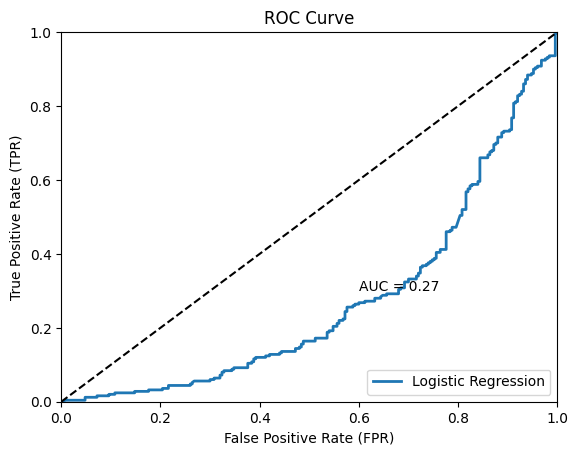

In [ ]:
#Testing data
test_data = pd.read_excel("/content/test_data_translation.xlsx")
# Text vectorization using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(test_data["final_text"])
y_test = test_data["Label"]
y_pred = model.predict(X_test_tfidf)

plot_roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1], 'Logistic Regression')

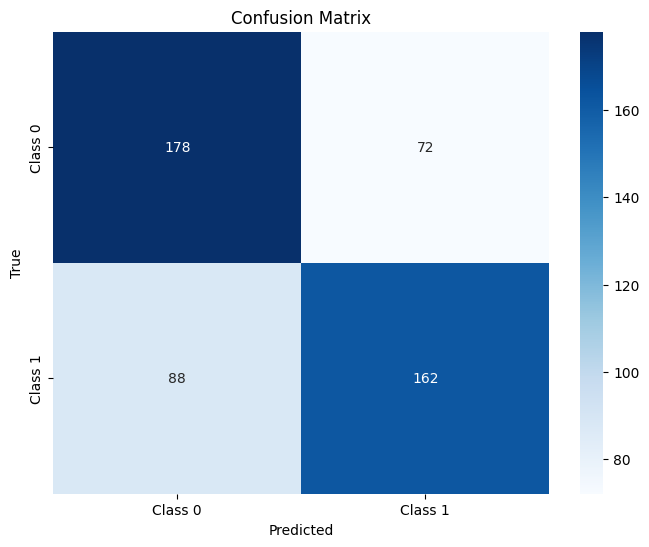

Accuracy: 0.68
Precision: 0.6691729323308271
Recall: 0.712
F1-Score: 0.689922480620155


In [ ]:
ml_model_eval(y_test,y_pred)

#Naive Bayes

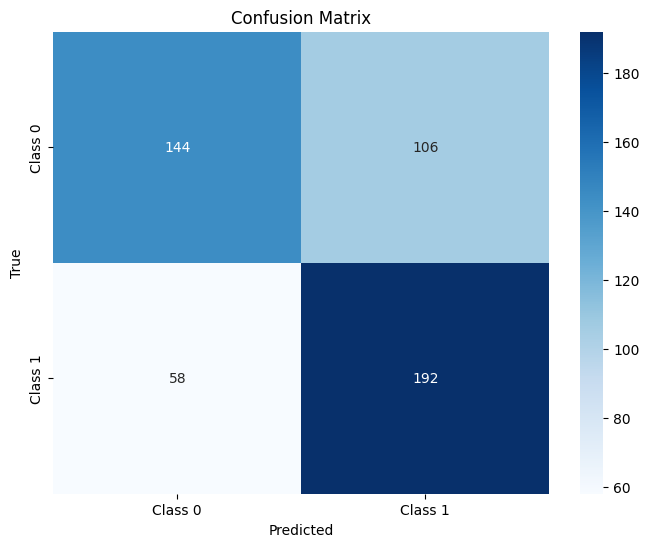

Accuracy: 0.672
Precision: 0.7128712871287128
Recall: 0.576
F1-Score: 0.6371681415929203


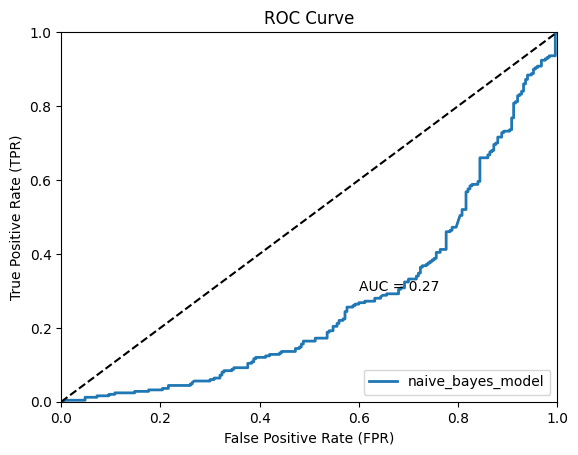

In [ ]:
#Creating a naive bayes model
from sklearn.naive_bayes import MultinomialNB
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

#Evaluating the model on the test data
X_test_tfidf = tfidf_vectorizer.transform(test_data["tokenized_comments"])
y_test = test_data["Label"]
y_pred = naive_bayes_model.predict(X_test_tfidf)
ml_model_eval(y_test,y_pred)
plot_roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1], 'naive_bayes_model')

#Support Vector Machine

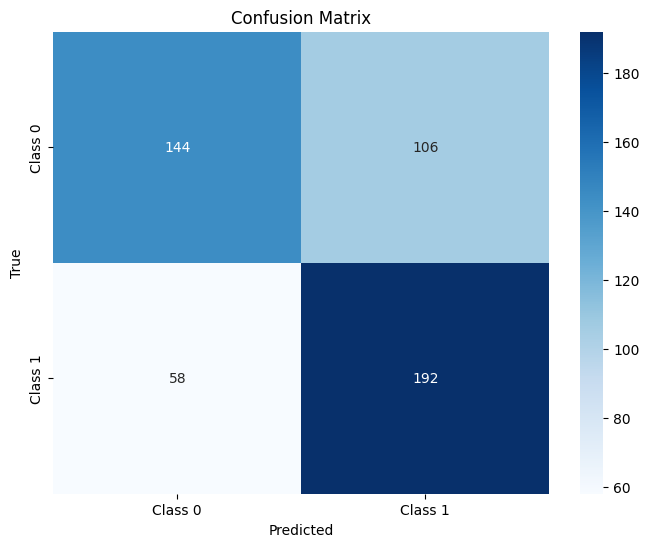

Accuracy: 0.672
Precision: 0.7128712871287128
Recall: 0.576
F1-Score: 0.6371681415929203


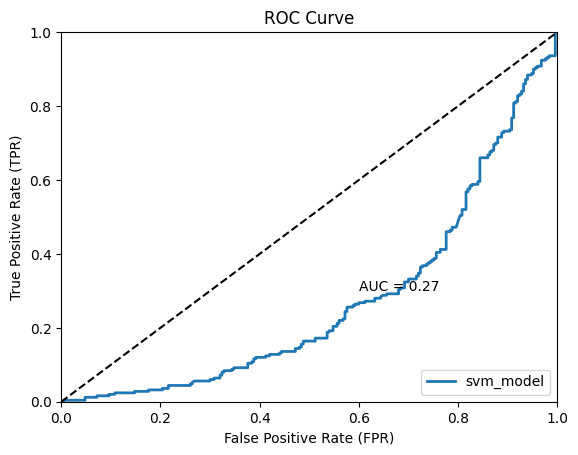

In [ ]:
from sklearn.svm import SVC

# Creating a Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_tfidf, y_train)

# Evaluating the model on the test data
y_pred_svm = svm_model.predict(X_test_tfidf)
ml_model_eval(y_test,y_pred)
plot_roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1], 'svm_model')

# Pre processing for sequencial DL models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
import numpy as np
# Training data
original_train_data = pd.read_excel('/content/train_data_translation.xlsx')
# Testing data
new_test_data = pd.read_excel('/content/test_data_translation.xlsx')


X_train = original_train_data["final_text"]
y_train = original_train_data["Label"]

X_test = new_test_data["final_text"]
y_test = new_test_data["Label"]

# Tokenizing the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Encoding labels as integers with a default index for unknown labels
label_to_index = {'non-hate': 0, 'hate': 1}
default_index = len(label_to_index)

y_train_encoded = [label_to_index.get(label, default_index) for label in y_train]
y_test_encoded = [label_to_index.get(label, default_index) for label in y_test]

# Converting the encoded labels to NumPy arrays and reshaping
y_train_encoded = np.array(y_train_encoded).reshape(-1, 1)
y_test_encoded = np.array(y_test_encoded).reshape(-1, 1)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def evaluate_model(model, X_test_padded, y_test, index_to_label):
    y_pred = model.predict(X_test_padded)
    y_pred = (y_pred > 0.5).astype(int)

    # Mapping predictions back to labels
    y_pred_labels = ['non-hate' if np.all(pred == 0) else 'hate' for pred in y_pred]
    y_test_labels = y_test

    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    precision = precision_score(y_test_labels, y_pred_labels, pos_label='hate')
    recall = recall_score(y_test_labels, y_pred_labels, pos_label='hate')
    f1 = f1_score(y_test_labels, y_pred_labels, pos_label='hate')
    plot_confusion_matrix(y_test_labels,y_pred_labels)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

#LSTM

#Single Cell

In [ ]:
y_train_encoded

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5168 - loss: 0.6938
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5264 - loss: 0.6919
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5023 - loss: 0.6933
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5102 - loss: 0.6953
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5169 - loss: 0.6934
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


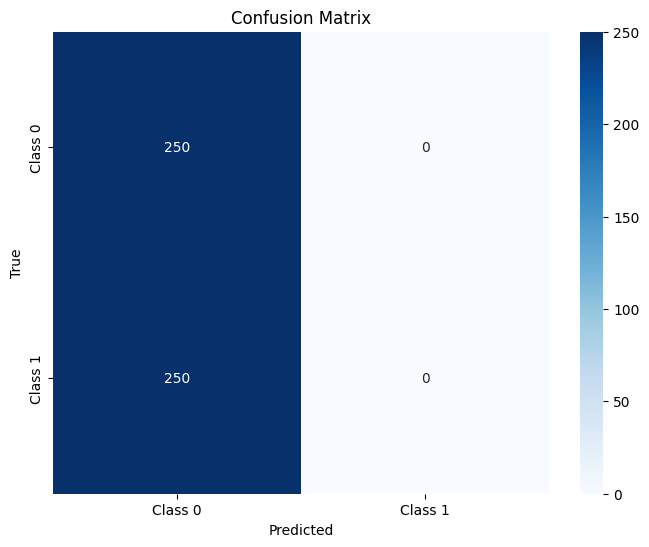

Evaluation Results (LSTM 2 cells ):
Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1-Score: 0.6666666666666666


In [ ]:
# Creating and compiling the model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model_lstm.add(LSTM(64)) # Change: Set return_sequences=False (default)
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
model_lstm.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

#Model evaluation
evaluation_results = evaluate_model(model_lstm, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (LSTM 2 cells ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

In [ ]:
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (32, 49, 100)          │       656,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (32, 64)               │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,095,817 (7.99 MB)

 Trainable params: 698,605 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,397,212 (5.33 MB)

#2 layers

In [ ]:
#Model creation
model_lstm1 = Sequential()
model_lstm1.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model_lstm1.add(LSTM(128, return_sequences=True))  # Return sequences for the first LSTM layer
model_lstm1.add(LSTM(64))  # Do not return sequences for the second LSTM layer
model_lstm1.add(Dense(1, activation='sigmoid'))  # Output layer with a single neuron for binary classification

model_lstm1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
model_lstm1.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4976 - loss: 0.6940
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5116 - loss: 0.6932
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5240 - loss: 0.6924
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5298 - loss: 0.6889
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6051 - loss: 0.6483


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


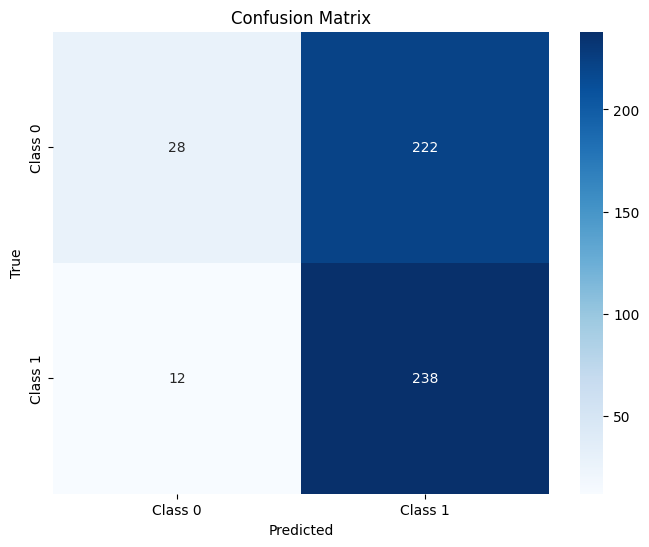

Evaluation Results (LSTM 2 cells ):
Accuracy: 0.532
Precision: 0.7
Recall: 0.112
F1-Score: 0.19310344827586207


In [ ]:
#Model evaluation
evaluation_results = evaluate_model(model_lstm1, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (LSTM 2 cells ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

In [ ]:
model_lstm1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (32, 49, 100)          │       656,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (32, 49, 128)          │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,469,065 (9.42 MB)

 Trainable params: 823,021 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,646,044 (6.28 MB)

#BI-LSTM

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5587 - loss: 0.6744
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8225 - loss: 0.4121
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9079 - loss: 0.2362
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9502 - loss: 0.1453
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9612 - loss: 0.1104
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


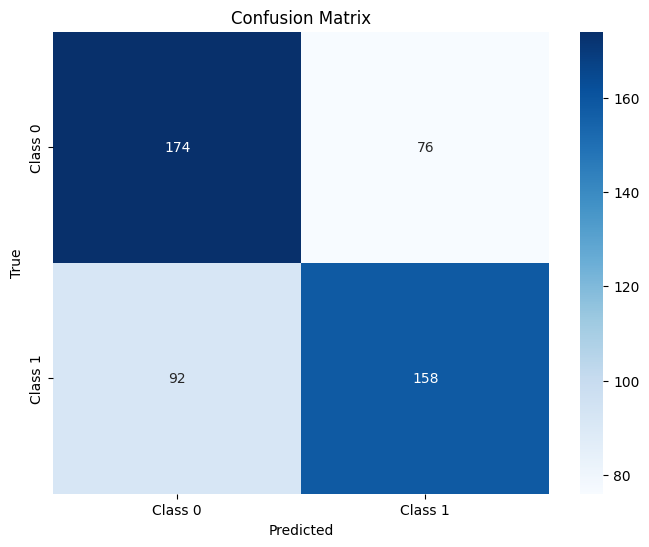

Evaluation Results (BiLSTM 1 cell ):
Accuracy: 0.664
Precision: 0.6541353383458647
Recall: 0.696
F1-Score: 0.6744186046511628


In [ ]:
# Model creation
bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=False))) #Change to return_sequences=False
bilstm_model.add(Dense(1, activation='sigmoid'))  # Changed to a single unit with sigmoid activation

bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
bilstm_model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

# Model evaluation
evaluation_results = evaluate_model(bilstm_model, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (BiLSTM 1 cell ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

In [ ]:
bilstm_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (32, 49, 100)          │       656,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (32, 128)              │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 1)                │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,222,729 (8.48 MB)

 Trainable params: 740,909 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,481,820 (5.65 MB)

#Two layers

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5491 - loss: 0.6748
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8564 - loss: 0.3814
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9151 - loss: 0.2427
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9246 - loss: 0.2066
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9492 - loss: 0.1497
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


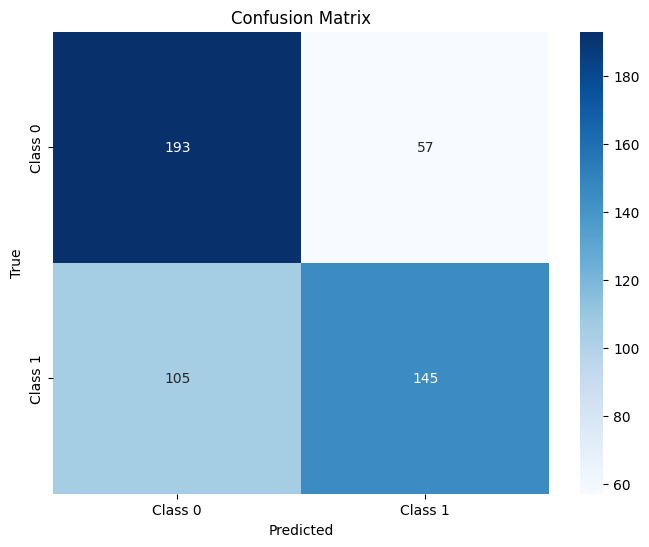

Evaluation Results (BiLSTM 2 cells ):
Accuracy: 0.676
Precision: 0.6476510067114094
Recall: 0.772
F1-Score: 0.7043795620437956


In [ ]:
#Model creation
bilstm_model1 = Sequential()
bilstm_model1.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
bilstm_model1.add(Bidirectional(LSTM(128, return_sequences=True)))
bilstm_model1.add(Bidirectional(LSTM(64, return_sequences=False))) # Change: Set return_sequences=False
bilstm_model1.add(Dense(64, activation='relu'))
bilstm_model1.add(Dense(32, activation='relu'))
bilstm_model1.add(Dense(1, activation='sigmoid'))

bilstm_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
bilstm_model1.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

#Model evaluation
evaluation_results = evaluate_model(bilstm_model1, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (BiLSTM 2 cells ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

#Stacking method of regular ML Models

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


In [ ]:
base_models = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True)),
    ('nb', MultinomialNB())
]

In [ ]:
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

In [ ]:
stacking_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = stacking_classifier.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test data: {accuracy}")

Accuracy on the test data: 0.688


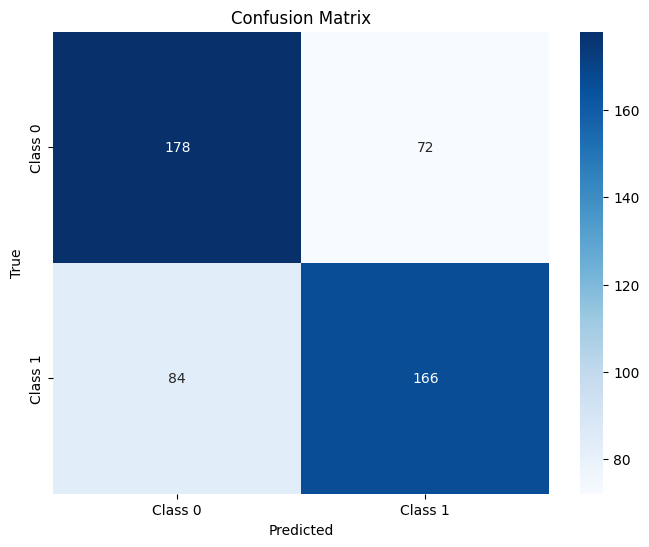

Accuracy: 0.688
Precision: 0.6793893129770993
Recall: 0.712
F1-Score: 0.6953125


In [ ]:
ml_model_eval(y_test,y_pred)